In [1]:
# CNN model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension (grayscale)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Check the shapes to confirm correctness
print(train_images.shape)  # Should be (60000, 28, 28, 1)
print(train_labels.shape)  # Should be (60000, 10)
print(test_images.shape)   # Should be (10000, 28, 28, 1)
print(test_labels.shape)   # Should be (10000, 10)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [3]:
# Create the 
def create_better_cnn_model():
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))

    # Output layer with 10 classes
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [4]:
# Callbacks: Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [5]:
# Create the model
cnn_model = create_better_cnn_model()

# Train the model with data augmentation
history = cnn_model.fit(train_images, train_labels,
                        validation_data=(test_images, test_labels),
                        epochs=30,
                        batch_size=64,
                        callbacks=[early_stopping, reduce_lr])

C:\Users\pawel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 62ms/step - accuracy: 0.6194 - loss: 1.6744 - val_accuracy: 0.8346 - val_loss: 0.9707 - learning_rate: 1.0000e-04
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.8263 - loss: 1.0057 - val_accuracy: 0.8593 - val_loss: 0.8582 - learning_rate: 1.0000e-04
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.8558 - loss: 0.8729 - val_accuracy: 0.8687 - val_loss: 0.7855 - learning_rate: 1.0000e-04
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.8757 - loss: 0.7664 - val_accuracy: 0.8776 - val_loss: 0.7228 - learning_rate: 1.0000e-04
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.8870 - loss: 0.6846 - val_accuracy: 0.8792 - val_loss: 0.6668 - learning_rate: 1.0000e-04
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8988 - loss: 0.6134 - val_accuracy: 0.8834 - val_loss: 0.6145 - learning_rate: 1.0000e-04
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8923 - loss: 0.4875
Test accuracy: 0.8919000029563904


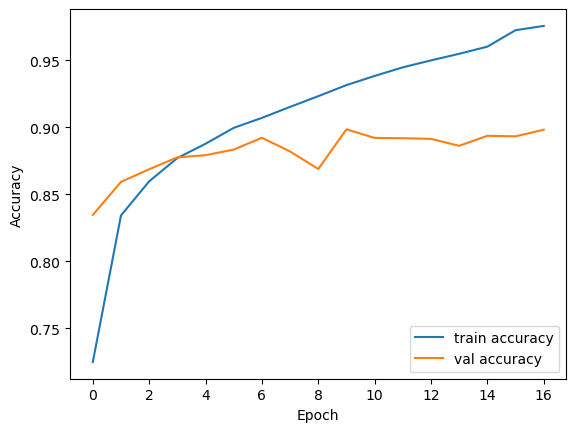

In [6]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [7]:
# Improved VGG16 Base Model with Fine-Tuning
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

In [8]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension (grayscale channel size 1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Resize images to 48x48 to fit VGG16 input size
train_images_resized = tf.image.resize(train_images, [48, 48])
test_images_resized = tf.image.resize(test_images, [48, 48])

# Convert grayscale (single channel) to RGB (3 channels)
train_images_rgb = tf.image.grayscale_to_rgb(train_images_resized)
test_images_rgb = tf.image.grayscale_to_rgb(test_images_resized)

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Check the shapes to verify
print(train_images_rgb.shape) 
print(test_images_rgb.shape) 

(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [9]:
# Load VGG16 without the top layers
vgg_base = VGG16(include_top=False, input_shape=(48, 48, 3), weights='imagenet')

# Unfreeze the last few layers for fine-tuning
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

# Build the model
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [10]:
# Compile the model with a learning rate scheduler
model.compile(optimizer=Adam(learning_rate=0.0005),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler to reduce learning rate if accuracy plateaus
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

In [11]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the datagen on training data
datagen.fit(train_images_rgb)

In [12]:
# Train the model
history = model.fit(datagen.flow(train_images_rgb, train_labels, batch_size=64),
                    validation_data=(test_images_rgb, test_labels),
                    epochs=30,
                    callbacks=[lr_reduction])

C:\Users\pawel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 501s 531ms/step - accuracy: 0.6997 - loss: 0.8776 - val_accuracy: 0.8767 - val_loss: 0.3350 - learning_rate: 5.0000e-04
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 477s 509ms/step - accuracy: 0.8644 - loss: 0.4007 - val_accuracy: 0.8818 - val_loss: 0.3297 - learning_rate: 5.0000e-04
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 505s 539ms/step - accuracy: 0.8799 - loss: 0.3570 - val_accuracy: 0.8953 - val_loss: 0.2956 - learning_rate: 5.0000e-04
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 541s 576ms/step - accuracy: 0.8859 - loss: 0.3324 - val_accuracy: 0.8969 - val_loss: 0.3018 - learning_rate: 5.0000e-04
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 604s 644ms/step - accuracy: 0.8892 - loss: 0.3224 - val_accuracy: 0.8914 - val_loss: 0.2959 - learning_rate: 5.0000e-04
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 489s 521ms/step - accuracy: 0.9011 - loss: 0.2931 - val_accuracy: 0.9063 - val_loss: 0.2738 - learning_rate: 5.0000e-04
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 171ms/step - accuracy: 0.9233 - loss: 0.2674
Test accuracy with VGG16: 0.9205999970436096


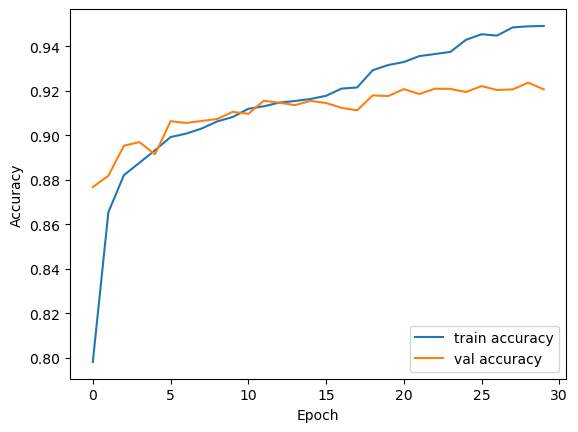

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels)
print(f"Test accuracy with VGG16: {test_acc}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()